# into to regression
Prediciting a numerical variable based on some other combitation of numbers

In [1]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

from tensorflow import keras


import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2024-12-14 10:54:24.136661: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-14 10:54:24.140241: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-14 10:54:24.150257: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734173664.167162  218567 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734173664.172070  218567 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-14 10:54:24.189118: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

2.18.0
Notebook last run (end-to-end): 2024-12-14 10:54:43.613170


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# create feathures
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
X

array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])

In [4]:
# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
y

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

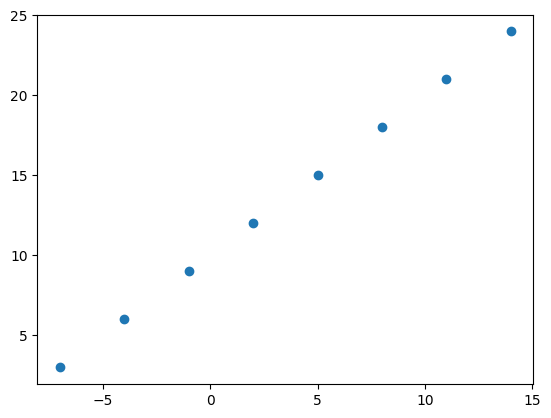

In [5]:
# vizualize
plt.scatter(X, y)

In [6]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## input & output shapes

In [7]:
# create demo tensor for housing price prediction
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

2024-12-14 10:54:57.374974: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [1]:
X[0].ndim

NameError: name 'X' is not defined

In [2]:
X[0], y[0]

NameError: name 'X' is not defined

In [11]:
# convert to tensors
X = tf.cast(tf.constant(X), tf.float64)
y = tf.cast(tf.constant(y), tf.float64)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape    # no 'shape' indicates a scalar value

(TensorShape([]), TensorShape([]))

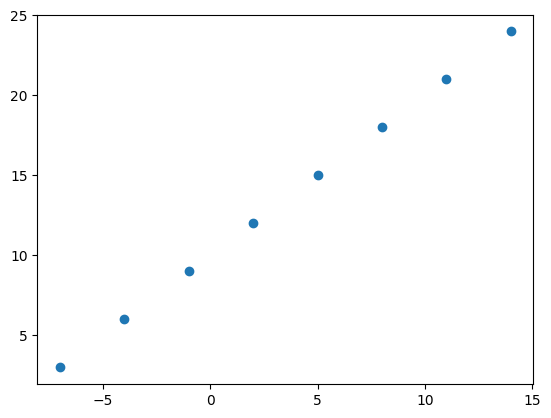

In [13]:
plt.scatter(X, y)

## steps in modelling with tensorflow

In [14]:
tf.random.set_seed(42)

# 1. create a model using the Sequential API
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1)
# ])

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
          
# compile the model
model.compile(
    loss=tf.keras.losses.mae,   # mae = 'mean absolute error'
    optimizer=tf.keras.optimizers.SGD(),   # sgd = 'stochastic gradient descent'
    metrics=["mae"]
)

# fir model
#model.fit(X, y, epochs=5)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=30)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - loss: 10.9209 - mae: 10.9209
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 10.7884 - mae: 10.7884
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 10.6559 - mae: 10.6559
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 10.5234 - mae: 10.5234
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 10.3909 - mae: 10.3909
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 10.2584 - mae: 10.2584
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 10.1259 - mae: 10.1259
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 9.9934 - mae: 9.9934
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 9.8609 - mae: 9.8609
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 9.7284 - mae: 9.7284
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 9.5959 - mae: 9.5959
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 9.4634 - mae: 9.4634
Epoch 13/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/s

In [15]:
# check out X & y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
# make a prediction
y_pred = model.predict(tf.cast([17.0], tf.float32))

y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[29.48191]], dtype=float32)

# improving model
1. **creating model**
   - add more layers
   - increase number of hidden units (neurons) within each of the hidden layers
   - change activation functipn of each layer
2. **compiling model**
    - change optimization function
    - modify **learning rate** of optimization function
3. **fitting model**
   - more **epochs** i.e. leave training for longer
   - supply more examples to learning from i.e. more data...

In [17]:
# rebuild model

# create 
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation=None),
    # tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])
      
# compile the model
model.compile(
    # loss=tf.keras.losses.mae,   # mae = 'mean absolute error'
    loss="mae",   # mae = 'mean absolute error'
    # optimizer=tf.keras.optimizers.SGD(),   # sgd = 'stochastic gradient descent'
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),   # sgd = 'stochastic gradient descent'
    metrics=["mae"]
)

# fir model
#model.fit(X, y, epochs=5)
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [18]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [19]:
# y_pred_32 = model.predict(tf.cast([17.0], tf.float32))
# y_pred_32


In [20]:
# prev: 29.814268


# evaluating a model

In [21]:
# make bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# maje labels for dataset
y = X + 10   # this is the formula that we want the model to learn
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

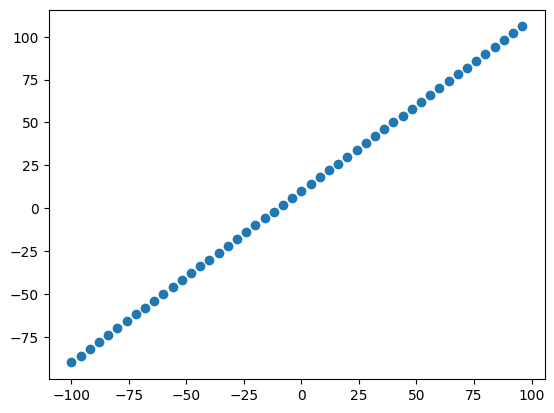

In [23]:
# visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [24]:
# split data
print(len(X))
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

print(f"X: {X}")


print(f"X_train : {len(X_train)}: {X_train}")
print(f"y_train : {len(y_train)}: {y_train}")

print(f"X_test : {len(X_test)}: {X_test}")
print(f"y_test : {len(y_test)}: {y_test}")

len(X_train), len(X_test), len(y_train), len(y_test)

50
X: [-100  -96  -92  -88  -84  -80  -76  -72  -68  -64  -60  -56  -52  -48
  -44  -40  -36  -32  -28  -24  -20  -16  -12   -8   -4    0    4    8
   12   16   20   24   28   32   36   40   44   48   52   56   60   64
   68   72   76   80   84   88   92   96]
X_train : 40: [-100  -96  -92  -88  -84  -80  -76  -72  -68  -64  -60  -56  -52  -48
  -44  -40  -36  -32  -28  -24  -20  -16  -12   -8   -4    0    4    8
   12   16   20   24   28   32   36   40   44   48   52   56]
y_train : 40: [-90 -86 -82 -78 -74 -70 -66 -62 -58 -54 -50 -46 -42 -38 -34 -30 -26 -22
 -18 -14 -10  -6  -2   2   6  10  14  18  22  26  30  34  38  42  46  50
  54  58  62  66]
X_test : 10: [60 64 68 72 76 80 84 88 92 96]
y_test : 10: [ 70  74  78  82  86  90  94  98 102 106]


(40, 10, 40, 10)

# visualize split

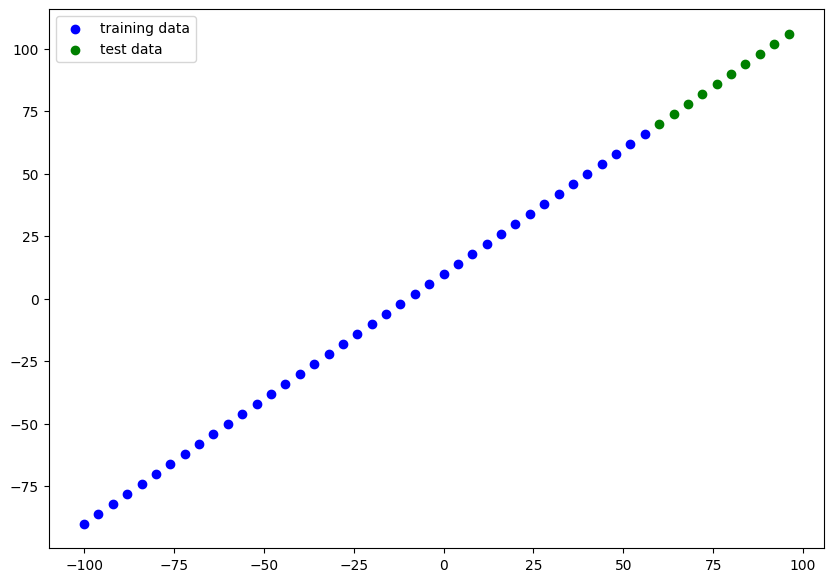

In [25]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="training data")
plt.scatter(X_test, y_test, c="g", label="test data")
plt.legend()

In [26]:
# build neural network
# rebuild model
tf.random.set_seed(42)

# create 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
      
# compile the model
model.compile(
    loss=tf.keras.losses.mae,   # mae = 'mean absolute error'
    optimizer=tf.keras.optimizers.SGD(),   # sgd = 'stochastic gradient descent'
    # optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),   # sgd = 'stochastic gradient descent'
    metrics=["mae"]
)

# fit model
# model.fit(tf.expand_dims(X_train, axis=-1), y, epochs=100)
# model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)


In [27]:
## visualizing the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
X.shape, X[0].shape

(TensorShape([50]), TensorShape([]))

In [39]:
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
  

In [40]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
# fit model
# model.fit(tf.expand_dims(X_train, axis=-1), y, epochs=100)

# model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

X_train.shape, y_train.shape

(TensorShape([40]), TensorShape([40]))

In [42]:
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
X_train_fit = tf.expand_dims(X_train, axis=-1)
y_train_fit = tf.expand_dims(y_train, axis=-1)

# model.fit(X_train_fit, y_train_fit, epochs=100, verbose=0) 

model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output


In [43]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

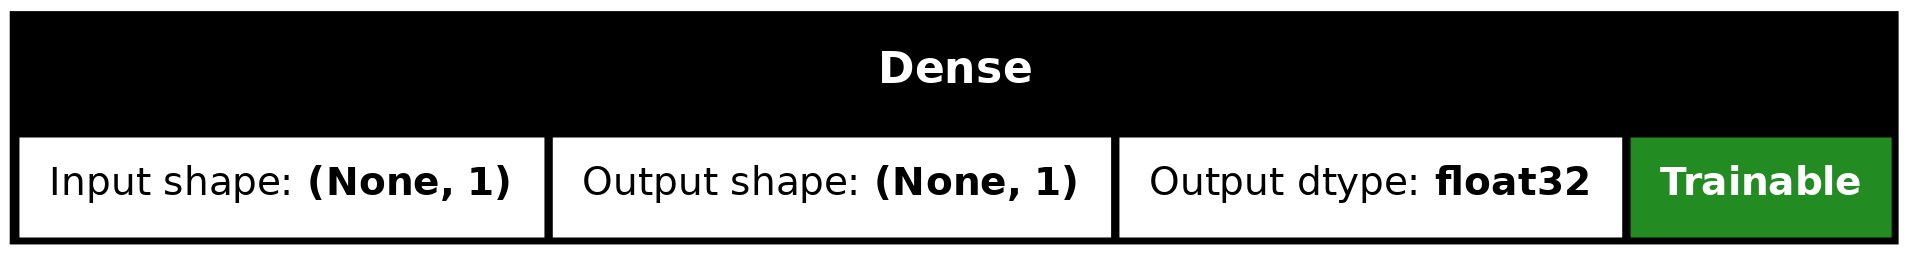

In [44]:
import pydot
import graphviz
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True, show_trainable=True, show_dtype=True)

# visualize predictions

In [45]:
# Make predictions

# y_pred = model.predict(tf.cast(X_test, tf.float32))

print(X_test)
y_preds = model.predict(X_test)  # tensor in same shape y_test
y_preds

tf.Tensor([60 64 68 72 76 80 84 88 92 96], shape=(10,), dtype=int32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[ 69.24178 ],
       [ 73.76365 ],
       [ 78.285515],
       [ 82.80739 ],
       [ 87.329254],
       [ 91.85113 ],
       [ 96.37299 ],
       [100.89486 ],
       [105.41673 ],
       [109.9386  ]], dtype=float32)

In [46]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [47]:
# plotting function
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

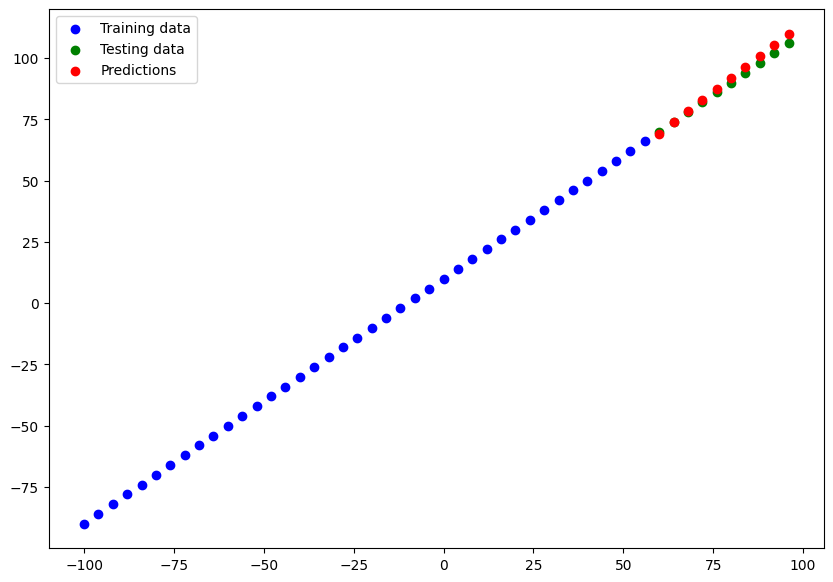

In [48]:
plot_predictions(X_train,
                y_train,
                X_test,
                y_test,
                y_preds)

# evaluation metrics

In [49]:
import statistics as st

In [50]:
# evaluaet model on the test set
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 1.7891 - mae: 1.7891


[1.7891037464141846, 1.7891037464141846]

In [51]:
# both parameters should be tensors & the same shape
metric_mse = tf.keras.losses.MAE(y_pred, 
                                 tf.constant(y_test)
                                )

metric_mse

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([41., 45., 49., 53., 57., 61., 65., 69., 73., 77.], dtype=float32)>

In [552]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=11.070453643798828>

In [553]:
metric_mae = tf.keras.losses.MAE(y_true=y_test, 
                                 y_pred=tf.squeeze(y_pred)
                                )
metric_mae

<tf.Tensor: shape=(), dtype=float32, numpy=76.92955017089844>

In [554]:
metric_mse = tf.keras.losses.MSE(y_true=y_test, 
                                 y_pred=tf.squeeze(y_pred)
                                )
metric_mse

<tf.Tensor: shape=(), dtype=float32, numpy=6050.1552734375>

In [555]:
# eva;uation metric functions
def mae(y_true, y_pred):
    return tf.keras.losses.MAE(y_true=y_true, 
                               y_pred=tf.squeeze(y_pred)
                            )
# MAE
def mse(y_true, y_pred):
    return tf.keras.losses.MSE(y_true=y_true, 
                               y_pred=tf.squeeze(y_pred)
                            )

# experiments

1. `model_1` : same as original, 1 layer for 100 epochs
2. `model_2` : 2 layers, 100 epochs
3. `model_3` : 2 layers, 500 epochs

#### build model 1

In [556]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [557]:
tf.random.set_seed(42)

# Create a model (same as above)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [558]:
model_1.fit(X_train, y_train, epochs=100, verbose=1) # verbose controls how much gets output


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.4349 - mae: 8.4349 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.9036 - mae: 9.9036
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.5665 - mae: 11.5665
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.5446 - mae: 8.5446
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 10.0133 - mae: 10.0133
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.7121 - mae: 11.7121
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.6543 - mae: 8.6543
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 10.1231 - mae: 10.1231
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 11.8577 - mae: 11.8577
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8.7641 - mae: 8.7641
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 10.2328 - mae: 10.2328
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12.0259 - mae: 12.0259
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━

In [559]:
y_preds_1 = model_1.predict(X_test)  # tensor in same shape y_test
y_preds_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[57.274097],
       [60.997746],
       [64.72139 ],
       [68.44504 ],
       [72.168686],
       [75.892334],
       [79.61598 ],
       [83.33963 ],
       [87.06328 ],
       [90.78693 ]], dtype=float32)

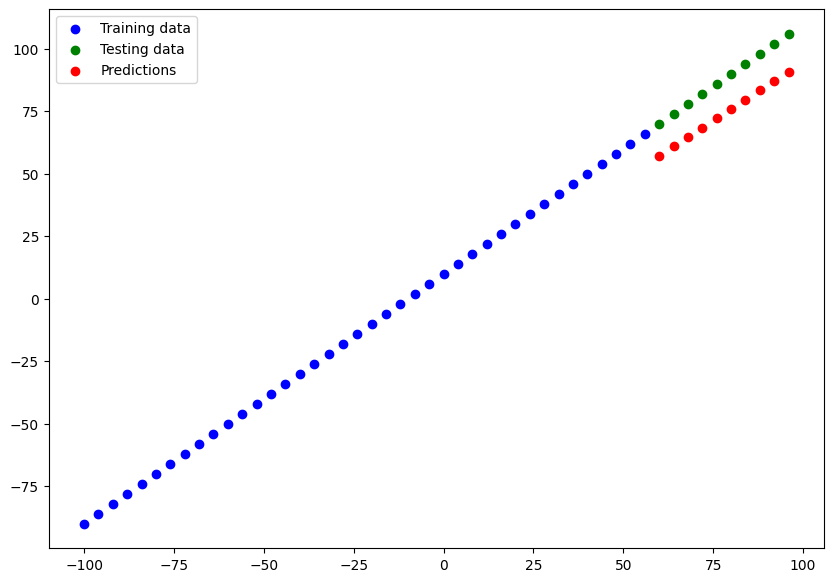

In [560]:
plot_predictions(X_train,
                y_train,
                X_test,
                y_test,
                y_preds_1)

In [561]:
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mse_1, mae_1

(<tf.Tensor: shape=(), dtype=float32, numpy=195.7766876220703>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.969488143920898>)

#### model 2: 2 layers, 100 units, 100 epochs

In [562]:
tf.random.set_seed(42)

# Create a model (same as above)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1]), # define the input_shape to our model
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])

model_2.fit(X_train, y_train, epochs=100, verbose=1) # verbose controls how much gets output


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 22.6518 - mse: 1170.4521
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 21.3818 - mse: 809.0055
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 20.1265 - mse: 600.4556
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 20.3669 - mse: 563.7328
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 17.8596 - mse: 437.2166
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 16.5998 - mse: 376.7620
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 16.8461 - mse: 383.6585
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 11.8407 - mse: 220.7159
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 14.7452 - mse: 303.5570
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 15.6441 - mse: 331.0047
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.7792 - mse: 213.8829
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 14.7649 - mse: 301.4416
Epoch 13/100

In [563]:
y_preds_2 = model_2.predict(X_test)  # tensor in same shape y_test
y_preds_2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[38.314293],
       [40.76213 ],
       [43.209965],
       [45.6578  ],
       [48.105633],
       [50.553467],
       [53.001305],
       [55.449142],
       [57.896973],
       [60.344803]], dtype=float32)

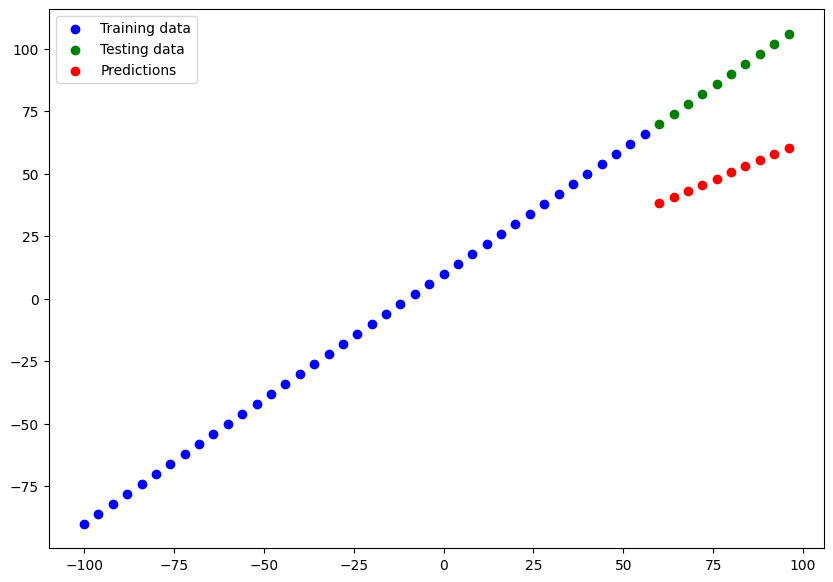

In [564]:
plot_predictions(X_train,
                y_train,
                X_test,
                y_test,
                y_preds_2)

In [565]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mse_2, mae_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1515.2796630859375>,
 <tf.Tensor: shape=(), dtype=float32, numpy=38.670448303222656>)

### model 3: 2 layers, 100 units, 500 epochs

In [566]:
tf.random.set_seed(42)

# Create a model (same as above)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1]), # define the input_shape to our model
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])

model_3.fit(X_train, y_train, epochs=500, verbose=1) # verbose controls how much gets output


Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 47.5350 - mse: 3242.5134 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 23.1504 - mse: 764.4571
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 22.1367 - mse: 665.5745
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 18.6456 - mse: 476.6867
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 16.8196 - mse: 388.5367
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 16.7569 - mse: 383.0821
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 16.6465 - mse: 374.2931
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.8586 - mse: 219.0355
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 14.7885 - mse: 304.0175
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 15.7443 - mse: 334.2335
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 11.9113 - mse: 215.4831
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 14.9229 - mse: 305.8801
Epoch 13/50

In [567]:
y_preds_3 = model_3.predict(X_test)  # tensor in same shape y_test
y_preds_3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[ 77.69227 ],
       [ 82.37326 ],
       [ 87.05427 ],
       [ 91.735275],
       [ 96.41626 ],
       [101.09727 ],
       [105.778275],
       [110.459274],
       [115.14027 ],
       [119.82127 ]], dtype=float32)

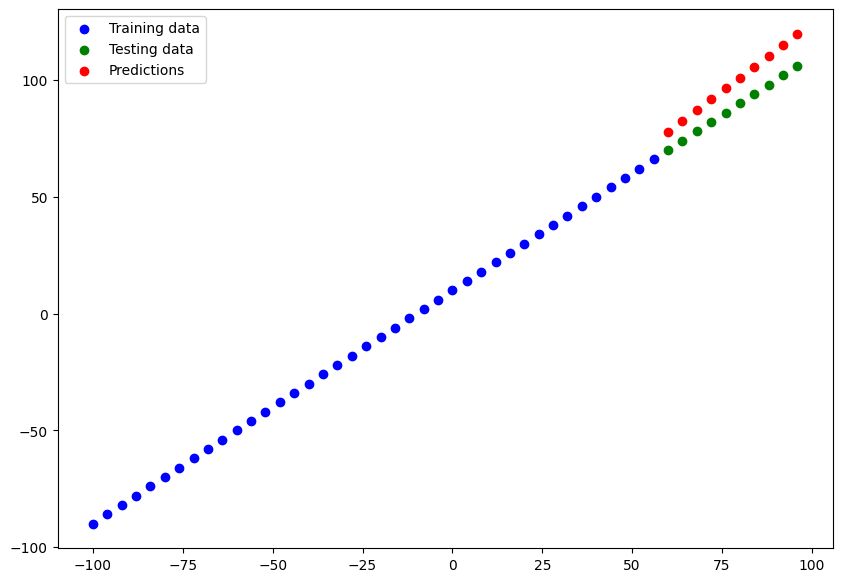

In [568]:
plot_predictions(X_train,
                y_train,
                X_test,
                y_test,
                y_preds_3)

In [569]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mse_3, mae_3

(<tf.Tensor: shape=(), dtype=float32, numpy=119.53410339355469>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.756769180297852>)

# compare results

In [570]:
# compare using pands dataframe
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results


,model,mae,mse
0,model_1,13.969488,195.776688
1,model_2,38.670448,1515.279663
2,model_3,10.756769,119.534103


In [571]:
model_1.summary()
model_2.summary()
model_3.summary()

Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [579]:
model_2.export("saved_models/model_2.SavedModel_format")
model_2.save("saved_models/model_2.SavedModel_format.keras")

INFO:tensorflow:Assets written to: saved_models/model_2.SavedModel_format/assets


INFO:tensorflow:Assets written to: saved_models/model_2.SavedModel_format/assets


Saved artifact at 'saved_models/model_2.SavedModel_format'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_176')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140012791405008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140012791407120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140012791407504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140012791399248: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [580]:
model_2.save("saved_models/model_2.SavedModel_format.h5")

In [582]:
loaded_model_2 = tf.keras.models.load_model("saved_models/model_2.SavedModel_format.keras")
loaded_model_2.summary()


Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [584]:
model_2_preds = model_2.predict(X_test)
loaded_model_2_preds = loaded_model_2.predict(X_test)
model_2_preds == loaded_model_2_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [589]:
mae_2_2 = mae(y_true=y_test , y_pred=loaded_model_2_preds)
mae_2_1 = mae(y_true=y_test , y_pred=model_2_preds)
mae_2_1, mae_2_2

(<tf.Tensor: shape=(), dtype=float32, numpy=38.670448303222656>,
 <tf.Tensor: shape=(), dtype=float32, numpy=38.670448303222656>)

In [590]:
from google.colab import files


ModuleNotFoundError: No module named 'google.colab'